In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
path = "C:\\Users\\ariel\\Desktop\\matala2_cosmetics_2019-Nov\\matala2_cosmetics_2019-Nov.csv"
file = pd.read_csv(path,low_memory = False)

In [4]:
data = file.iloc[:50001].append(file.iloc[780000:800000]).append(file.iloc[1780000:1800000]).append(file.iloc[2780000:2800000]).copy()

C:\Users\ariel\AppData\Local\Temp\ipykernel_3352\771643317.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = file.iloc[:50001].append(file.iloc[780000:800000]).append(file.iloc[1780000:1800000]).append(file.iloc[2780000:2800000]).copy()
C:\Users\ariel\AppData\Local\Temp\ipykernel_3352\771643317.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = file.iloc[:50001].append(file.iloc[780000:800000]).append(file.iloc[1780000:1800000]).append(file.iloc[2780000:2800000]).copy()


# Q1

In [5]:
data['event_time']= pd.to_datetime(data['event_time']) #So that we can do actions on the column of times
data = data.sort_values(['user_session', 'event_time']) #In case if the data is not arranged according to the order of times and sessions, we will arrange them now
data['duration_to_next_event'] = data.groupby('user_session')['event_time'].diff().shift(periods=-1).fillna(pd.Timedelta(seconds=0))
data.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
2792529,2019-11-21 10:09:53+00:00,view,5694897,1487580009076883471,NaN,NaN,1.14,574355965,00042372-a7dd-40e6-8ad1-f408864d2901,0 days 00:00:00
2789913,2019-11-21 09:56:44+00:00,view,5770331,1487580007717929935,NaN,milv,0.63,562938528,0005d374-dd22-4056-82b1-9722cd480db3,0 days 00:00:46
2790047,2019-11-21 09:57:30+00:00,view,47610,1487580007717929935,NaN,NaN,0.73,562938528,0005d374-dd22-4056-82b1-9722cd480db3,0 days 00:00:00
1798803,2019-11-14 02:50:26+00:00,view,5881608,2151191071051219817,NaN,lovely,13.48,488388682,000686f8-7f7a-40e1-ae7d-bc4792245200,0 days 00:00:00
1468,2019-11-01 01:35:21+00:00,view,4765,1487580010796548183,NaN,runail,0.38,566291244,0006b6fd-2930-4652-a4de-3c10b6ba131a,0 days 00:00:00
46035,2019-11-01 11:28:41+00:00,view,5840120,1487580011585077370,NaN,NaN,1.49,530546952,0006fab1-42de-48d9-a025-00de4b67e282,0 days 00:00:00
782153,2019-11-06 21:36:22+00:00,cart,4497,1487580006895846315,NaN,runail,3.11,568353048,00090d48-ef80-4bc8-b1d0-5c401f7761cb,0 days 00:00:06
782163,2019-11-06 21:36:28+00:00,cart,4497,1487580006895846315,NaN,runail,3.11,568353048,00090d48-ef80-4bc8-b1d0-5c401f7761cb,0 days 00:00:02
782166,2019-11-06 21:36:30+00:00,cart,4497,1487580006895846315,NaN,runail,3.11,568353048,00090d48-ef80-4bc8-b1d0-5c401f7761cb,0 days 00:00:16
782185,2019-11-06 21:36:46+00:00,cart,5774340,1487580006895846315,NaN,runail,4.13,568353048,00090d48-ef80-4bc8-b1d0-5c401f7761cb,0 days 00:00:39


# Q2

In [6]:
data = data.sort_values(['user_id', 'event_time']) 
data['check_funnel']= data.groupby('user_id')['event_time'].diff().apply(lambda x: pd.Timedelta(x).days)

In [7]:
data['bigger_than5']= np.where(data['check_funnel']>=5,1,0)
data['funnel_number']= data.groupby('user_id')['bigger_than5'].cumsum()+1
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,check_funnel,bigger_than5,funnel_number
44711,2019-11-01 11:16:58+00:00,view,5866215,1487580008246412266,NaN,NaN,8.79,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:01:28,NaN,0,1
44881,2019-11-01 11:18:26+00:00,cart,5899429,1487580008263189483,NaN,NaN,6.75,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:00:02,0.0,0,1
44882,2019-11-01 11:18:28+00:00,cart,5899431,1487580008246412266,NaN,NaN,11.44,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:00:13,0.0,0,1
44908,2019-11-01 11:18:41+00:00,cart,5899426,1487580009143992338,NaN,NaN,12.73,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:00:02,0.0,0,1
44913,2019-11-01 11:18:43+00:00,cart,5899427,1783999067156644376,NaN,NaN,17.63,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:00:23,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799942,2019-11-21 10:43:40+00:00,view,5847363,1982860263572898112,NaN,estel,4.06,574370132,92f90743-6907-4583-b4f8-4fc3e9f253f6,0 days 00:00:00,0.0,0,1
2799815,2019-11-21 10:43:12+00:00,view,5784670,1487580005880824699,NaN,irisk,2.06,574370158,41519e87-6cd6-4674-98bc-1834f896dcc7,0 days 00:00:00,NaN,0,1
2799841,2019-11-21 10:43:20+00:00,view,5866143,1897124478404526487,NaN,NaN,3.81,574370205,87d73c67-6988-4027-ac35-842dea5d3176,0 days 00:00:00,NaN,0,1
2799869,2019-11-21 10:43:28+00:00,view,5804286,1487580005411062629,NaN,cnd,14.13,574370259,06347f30-303c-4271-beba-3251bbf724bf,0 days 00:00:00,NaN,0,1


# Q3

In [8]:
new_data3 = data.copy()
new_data3.drop_duplicates(subset = 'user_session', inplace=True)
new_data3['index_in_funnel'] = new_data3.groupby(['user_id','funnel_number'])['user_session'].cumcount() + 1
new_data3 = new_data3.drop(['event_time', 'event_type', 'product_id', 'category_id','category_code', 'brand', 'price', 'user_id','duration_to_next_event', 'check_funnel','bigger_than5', 'funnel_number'], axis=1)

In [9]:
merged_df = pd.merge(data, new_data3, on='user_session', how='right')
merged_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,check_funnel,bigger_than5,funnel_number,index_in_funnel
0,2019-11-01 11:16:58+00:00,view,5866215,1487580008246412266,NaN,NaN,8.79,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:01:28,NaN,0,1,1
1,2019-11-01 11:18:26+00:00,cart,5899429,1487580008263189483,NaN,NaN,6.75,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:00:02,0.0,0,1,1
2,2019-11-01 11:18:28+00:00,cart,5899431,1487580008246412266,NaN,NaN,11.44,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:00:13,0.0,0,1,1
3,2019-11-01 11:18:41+00:00,cart,5899426,1487580009143992338,NaN,NaN,12.73,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:00:02,0.0,0,1,1
4,2019-11-01 11:18:43+00:00,cart,5899427,1783999067156644376,NaN,NaN,17.63,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:00:23,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109996,2019-11-21 10:43:40+00:00,view,5847363,1982860263572898112,NaN,estel,4.06,574370132,92f90743-6907-4583-b4f8-4fc3e9f253f6,0 days 00:00:00,0.0,0,1,1
109997,2019-11-21 10:43:12+00:00,view,5784670,1487580005880824699,NaN,irisk,2.06,574370158,41519e87-6cd6-4674-98bc-1834f896dcc7,0 days 00:00:00,NaN,0,1,1
109998,2019-11-21 10:43:20+00:00,view,5866143,1897124478404526487,NaN,NaN,3.81,574370205,87d73c67-6988-4027-ac35-842dea5d3176,0 days 00:00:00,NaN,0,1,1
109999,2019-11-21 10:43:28+00:00,view,5804286,1487580005411062629,NaN,cnd,14.13,574370259,06347f30-303c-4271-beba-3251bbf724bf,0 days 00:00:00,NaN,0,1,1


# Q4

In [10]:
def convert (price):
    pattern = r"[^0-9.]"
    return re.sub(pattern, "", price)


In [11]:
data['price'] = data['price'].apply(convert) 

# Q5

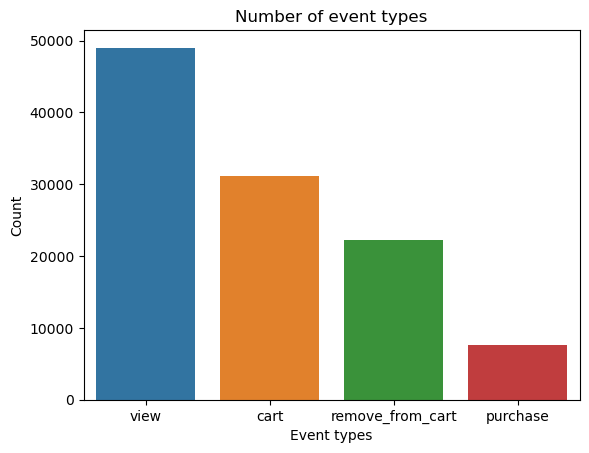

In [12]:
# Create the count plot
sns.countplot(x="event_type", data=data)

# Add labels and title
plt.xlabel("Event types")
plt.ylabel("Count")
plt.title("Number of event types")

# Show the plot
plt.show()

# Q6

In [13]:
new_data6 = data.copy()
new_data6['total_events']= data.groupby('user_session')['event_type'].transform('count')

In [14]:
# Group the data by 'user_session'
grouped = new_data6.groupby('user_session')

# Calculate the duration of each session
temp = grouped['event_time'].max() - grouped['event_time'].min()
# data6
# data6[data6['user_id']== 566307474]

new_data6 = pd.merge(new_data6, temp, on='user_session', how='right')

new_data6 = new_data6.rename(columns={'event_time_y': 'session_duration'})
new_data6[new_data6['user_id']== 566307474]

,event_time_x,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,check_funnel,bigger_than5,funnel_number,total_events,session_duration
6581,2019-11-01 03:50:23+00:00,view,5724641,1487580005427839846,NaN,irisk,2.48,566307474,0fc0553c-ad27-4fcf-87f8-3225e9cd7304,0 days 00:00:19,NaN,0,1,8.0,0 days 00:30:15
6582,2019-11-01 03:50:42+00:00,view,5683541,1487580005595612013,NaN,NaN,2.05,566307474,0fc0553c-ad27-4fcf-87f8-3225e9cd7304,0 days 00:00:19,0.0,0,1,8.0,0 days 00:30:15
6583,2019-11-01 03:51:01+00:00,view,5839703,1487580005671109489,NaN,masura,1.73,566307474,0fc0553c-ad27-4fcf-87f8-3225e9cd7304,0 days 00:02:27,0.0,0,1,8.0,0 days 00:30:15
6584,2019-11-01 03:53:28+00:00,view,5739030,1645114480121610699,NaN,kapous,3.97,566307474,0fc0553c-ad27-4fcf-87f8-3225e9cd7304,0 days 00:00:30,0.0,0,1,8.0,0 days 00:30:15
6585,2019-11-01 03:53:58+00:00,view,5823778,1487580013749338323,NaN,estel,2.38,566307474,0fc0553c-ad27-4fcf-87f8-3225e9cd7304,0 days 00:17:02,0.0,0,1,8.0,0 days 00:30:15
6586,2019-11-01 04:11:00+00:00,view,5886346,1487580013296353468,NaN,NaN,6.24,566307474,0fc0553c-ad27-4fcf-87f8-3225e9cd7304,0 days 00:02:53,0.0,0,1,8.0,0 days 00:30:15
6587,2019-11-01 04:13:53+00:00,view,5886343,1487580013296353468,NaN,NaN,0.0,566307474,0fc0553c-ad27-4fcf-87f8-3225e9cd7304,0 days 00:06:45,0.0,0,1,8.0,0 days 00:30:15
6588,2019-11-01 04:20:38+00:00,view,5788435,2151191071378375538,NaN,NaN,0.79,566307474,0fc0553c-ad27-4fcf-87f8-3225e9cd7304,0 days 00:00:00,0.0,0,1,8.0,0 days 00:30:15
12664,2019-11-14 00:40:23+00:00,view,5677930,1487580013732561106,NaN,estel,5.79,566307474,1ce54758-7e12-3960-4a02-ad0ceb2ea8d0,0 days 00:01:49,12.0,1,2,13.0,0 days 02:03:05
12665,2019-11-14 00:42:12+00:00,view,5810907,1487580008263189483,NaN,NaN,8.03,566307474,1ce54758-7e12-3960-4a02-ad0ceb2ea8d0,0 days 00:02:03,0.0,0,2,13.0,0 days 02:03:05


In [15]:
pre_pivot = new_data6.groupby(['user_session','event_type']).agg(
{
    'product_id': lambda x: list(set(x))
}).reset_index()
    

In [16]:
# pivot the data by user_session and event_type
pivot_df = pre_pivot.pivot_table(index='user_session', columns='event_type', values='product_id', aggfunc='first')

# reset the index to make the user_session a regular column
result = pivot_df.reset_index()
result

event_type,user_session,cart,purchase,remove_from_cart,view
0,00042372-a7dd-40e6-8ad1-f408864d2901,NaN,NaN,NaN,[5694897]
1,0005d374-dd22-4056-82b1-9722cd480db3,NaN,NaN,NaN,"[47610, 5770331]"
2,000686f8-7f7a-40e1-ae7d-bc4792245200,NaN,NaN,NaN,[5881608]
3,0006b6fd-2930-4652-a4de-3c10b6ba131a,NaN,NaN,NaN,[4765]
4,0006fab1-42de-48d9-a025-00de4b67e282,NaN,NaN,NaN,[5840120]
...,...,...,...,...,...
23539,fff7c60d-6365-4131-8361-20bfe84cd221,NaN,NaN,NaN,[5861786]
23540,fffa210c-2f1b-4921-a7d9-dedf567c3772,NaN,NaN,NaN,"[5786484, 5785454]"
23541,fffb4273-c0dd-4032-964a-d798a4db74b1,"[5739097, 5682468]",NaN,"[5863821, 5863822, 5863823]","[5739097, 5682468]"
23542,fffbd1a4-9014-4265-b330-f3710112fc98,NaN,NaN,NaN,[5745720]


In [17]:
new_data6.drop_duplicates(subset='user_session', inplace=True)
new_data6 = pd.merge(new_data6, result, on='user_session', how='right')
new_data6

,event_time_x,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,check_funnel,bigger_than5,funnel_number,total_events,session_duration,cart,purchase,remove_from_cart,view
0,2019-11-21 10:09:53+00:00,view,5694897,1487580009076883471,NaN,NaN,1.14,574355965,00042372-a7dd-40e6-8ad1-f408864d2901,0 days 00:00:00,NaN,0,1,1.0,0 days 00:00:00,NaN,NaN,NaN,[5694897]
1,2019-11-21 09:56:44+00:00,view,5770331,1487580007717929935,NaN,milv,0.63,562938528,0005d374-dd22-4056-82b1-9722cd480db3,0 days 00:00:46,7.0,1,2,2.0,0 days 00:00:46,NaN,NaN,NaN,"[47610, 5770331]"
2,2019-11-14 02:50:26+00:00,view,5881608,2151191071051219817,NaN,lovely,13.48,488388682,000686f8-7f7a-40e1-ae7d-bc4792245200,0 days 00:00:00,0.0,0,1,1.0,0 days 00:00:00,NaN,NaN,NaN,[5881608]
3,2019-11-01 01:35:21+00:00,view,4765,1487580010796548183,NaN,runail,0.38,566291244,0006b6fd-2930-4652-a4de-3c10b6ba131a,0 days 00:00:00,NaN,0,1,1.0,0 days 00:00:00,NaN,NaN,NaN,[4765]
4,2019-11-01 11:28:41+00:00,view,5840120,1487580011585077370,NaN,NaN,1.49,530546952,0006fab1-42de-48d9-a025-00de4b67e282,0 days 00:00:00,0.0,0,1,1.0,0 days 00:00:00,NaN,NaN,NaN,[5840120]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23539,2019-11-01 05:58:50+00:00,view,5861786,1487580013690618064,NaN,parachute,6.32,556482596,fff7c60d-6365-4131-8361-20bfe84cd221,0 days 00:00:00,NaN,0,1,1.0,0 days 00:00:00,NaN,NaN,NaN,[5861786]
23540,2019-11-01 11:49:40+00:00,view,5786484,1658462125284131265,NaN,uskusi,3.97,522868810,fffa210c-2f1b-4921-a7d9-dedf567c3772,0 days 00:00:20,NaN,0,1,2.0,0 days 00:00:20,NaN,NaN,NaN,"[5786484, 5785454]"
23541,2019-11-01 11:56:48+00:00,remove_from_cart,5863822,1487580005713052531,NaN,ingarden,4.44,477491315,fffb4273-c0dd-4032-964a-d798a4db74b1,0 days 00:00:00,NaN,0,1,9.0,0 days 00:02:51,"[5739097, 5682468]",NaN,"[5863821, 5863822, 5863823]","[5739097, 5682468]"
23542,2019-11-14 03:32:11+00:00,view,5745720,1487580006317032337,NaN,irisk,8.57,571272026,fffbd1a4-9014-4265-b330-f3710112fc98,0 days 00:00:00,NaN,0,1,1.0,0 days 00:00:00,NaN,NaN,NaN,[5745720]


In [18]:
new_data6.columns=['event_time', 'event_type', 'product_id', 'category_id','category_code', 'brand', 'price', 'user_id', 'user_session', 'duration_to_next_event' ,'check_funnel','bigger_than5', 'funnel_number', 'total_events', 'session_duration','list_of_added_to_cart', 'list_of_purchased', 'remove_from_cart', 'list_of_viewed']
new_data6 = pd.merge(new_data6, new_data3, on='user_session', how='right')
new_data6.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,check_funnel,bigger_than5,funnel_number,total_events,session_duration,list_of_added_to_cart,list_of_purchased,remove_from_cart,list_of_viewed,index_in_funnel
0,2019-11-01 11:16:58+00:00,view,5866215.0,1.487580e+18,NaN,NaN,8.79,13117447.0,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0 days 00:01:28,NaN,0.0,1.0,7.0,0 days 00:08:16,"[5899426, 5899427, 5899428, 5899429, 5899431]",NaN,NaN,"[5899429, 5866215]",1
1,2019-11-13 21:11:28+00:00,view,5802162.0,1.487580e+18,NaN,italwax,23.81,25635927.0,c7439e5c-c7cd-477f-9194-2189e6c8d19d,0 days 00:00:57,NaN,0.0,1.0,3.0,0 days 00:03:43,[5802162],NaN,NaN,"[5802162, 5766980]",1
2,2019-11-13 21:02:47+00:00,view,5870366.0,1.487580e+18,NaN,NaN,5.24,31156111.0,6db080df-701d-483c-9ae7-b92eba8dbca0,0 days 00:00:00,NaN,0.0,1.0,1.0,0 days 00:00:00,NaN,NaN,NaN,[5870366],1
3,2019-11-21 09:26:15+00:00,view,5632482.0,1.487580e+18,NaN,masura,2.05,49353510.0,0bf8b54f-5b6e-4d16-b54a-b56973e6acbf,0 days 00:00:00,NaN,0.0,1.0,1.0,0 days 00:00:00,NaN,NaN,NaN,[5632482],1
4,2019-11-21 09:29:37+00:00,view,5650530.0,1.487580e+18,NaN,masura,3.27,49353510.0,f5b88238-4413-4efa-9cb3-f40d5704760b,0 days 00:00:00,0.0,0.0,1.0,1.0,0 days 00:00:00,NaN,NaN,NaN,[5650530],2


In [19]:
session_data = new_data6.drop(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price','duration_to_next_event', 'check_funnel', 'bigger_than5', 'remove_from_cart'], axis=1)

session_data.dropna(subset=['user_id'], inplace=True)
session_data

,user_id,user_session,funnel_number,total_events,session_duration,list_of_added_to_cart,list_of_purchased,list_of_viewed,index_in_funnel
0,13117447.0,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,1.0,7.0,0 days 00:08:16,"[5899426, 5899427, 5899428, 5899429, 5899431]",NaN,"[5899429, 5866215]",1
1,25635927.0,c7439e5c-c7cd-477f-9194-2189e6c8d19d,1.0,3.0,0 days 00:03:43,[5802162],NaN,"[5802162, 5766980]",1
2,31156111.0,6db080df-701d-483c-9ae7-b92eba8dbca0,1.0,1.0,0 days 00:00:00,NaN,NaN,[5870366],1
3,49353510.0,0bf8b54f-5b6e-4d16-b54a-b56973e6acbf,1.0,1.0,0 days 00:00:00,NaN,NaN,[5632482],1
4,49353510.0,f5b88238-4413-4efa-9cb3-f40d5704760b,1.0,1.0,0 days 00:00:00,NaN,NaN,[5650530],2
...,...,...,...,...,...,...,...,...,...
23540,574370132.0,92f90743-6907-4583-b4f8-4fc3e9f253f6,1.0,2.0,0 days 00:00:27,[5695622],NaN,[5847363],1
23541,574370158.0,41519e87-6cd6-4674-98bc-1834f896dcc7,1.0,1.0,0 days 00:00:00,NaN,NaN,[5784670],1
23542,574370205.0,87d73c67-6988-4027-ac35-842dea5d3176,1.0,1.0,0 days 00:00:00,NaN,NaN,[5866143],1
23543,574370259.0,06347f30-303c-4271-beba-3251bbf724bf,1.0,1.0,0 days 00:00:00,NaN,NaN,[5804286],1
